# **1. Data Loading and Preprocessing**

## **Introduction**
The initial phase of this study involves **data loading and preprocessing**, which lays the foundation for effective analysis and machine learning modeling. The dataset under consideration contains **568,454 user-generated reviews**, capturing textual feedback along with metadata such as numerical ratings, timestamps, and helpfulness scores. Given the sheer volume and diversity of the dataset, meticulous preprocessing is critical to ensure reliability and accuracy in downstream tasks.

## **Objectives of this Section**
- **Efficiently load the dataset** while minimizing memory usage.
- **Verify dataset integrity** by inspecting shape and column structure.
- **Handle missing values and duplicates** to prevent distortions in analysis.
- **Select only relevant features** that contribute to the classification task.
- **Engineer a new feature (`Combined_Text`)** by merging short (`Summary`) and long (`Text`) reviews.
- **Transform numerical ratings (`Score`) into categorical satisfaction levels (`User_Satisfaction`)** for supervised classification.

## **Dataset Structure (Before Processing)**
Upon loading the dataset, we retrieve the following properties:

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('Reviews.csv', encoding='ISO-8859-1', low_memory=False)

# Display dataset shape to confirm full loading
print(f"Dataset shape: {data.shape}")

# Show column names to verify
print(f"Columns: {data.columns}")


Dataset shape: (568454, 10)
Columns: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


The dataset comprises **568,454 rows** and **10 columns**, capturing a mix of numerical, categorical, and textual data. 

## **Dataset Column Descriptions**

The dataset consists of user-generated reviews, capturing essential details about products, users, ratings, and feedback. Each row represents an individual review, accompanied by metadata that provides context for the evaluation.

---

## **Column Descriptions**

### **1. Id**
- **Definition**: A unique identifier assigned to each row in the dataset.
- **Type**: Integer

### **2. ProductId**
- **Definition**: A unique alphanumeric identifier associated with each product.
- **Type**: String

### **3. UserId**
- **Definition**: A unique identifier assigned to each user who submitted a review.
- **Type**: String

### **4. ProfileName**
- **Definition**: The display name of the user who submitted the review.
- **Type**: String

### **5. HelpfulnessNumerator**
- **Definition**: The number of users who found the review helpful.
- **Type**: Integer

### **6. HelpfulnessDenominator**
- **Definition**: The total number of users who provided feedback on whether a review was helpful.
- **Type**: Integer

### **7. Score**
- **Definition**: The rating provided by the user, ranging from 1 to 5.
- **Type**: Integer (1-5)
- **Purpose**: Represents the user's sentiment about the product.
  - **5** → Highly Satisfied
  - **4** → Satisfied
  - **3** → Neutral
  - **2** → Not Satisfied
  - **1** → Very Bad

### **8. Time**
- **Definition**: A Unix timestamp representing the date and time when the review was posted.
- **Type**: Integer

### **9. Summary**
- **Definition**: A brief, high-level summary of the review provided by the user.
- **Type**: String

### **10. Text**
- **Definition**: The full-length detailed review written by the user.
- **Type**: String
---

## **Data Cleaning Steps**
1. **Handling Missing Values**:
   - Since the `Score` column is central to our classification task, all rows with `NaN` values in `Score` are removed.
   - Missing values in textual fields (`Summary` and `Text`) are replaced with empty strings (`""`) to ensure consistency in text processing.

2. **Removing Duplicates**:
   - Identical reviews can distort classification models by **artificially inflating the occurrence of certain labels**. Therefore, we eliminate duplicate rows.

3. **Feature Selection**:
   - To reduce computational complexity and enhance model interpretability, we retain only the most pertinent columns:
     - `HelpfulnessNumerator`: Number of users who found the review helpful.
     - `HelpfulnessDenominator`: Total number of users who rated helpfulness.
     - `Score`: The numerical rating given by the reviewer (1 to 5).
     - `Summary`: A brief overview of the review.
     - `Text`: The full review content.

4. **Feature Engineering (`Combined_Text`)**:
   - The `Summary` column contains **concise expressions of user sentiment**, whereas the `Text` column provides **detailed qualitative feedback**.
   - To **capture both short- and long-form sentiment**, we concatenate them into a new column:  
     ```
     Combined_Text = Summary + " " + Text
     ```

## **Transforming the `Score` Column**
The numerical `Score` column is mapped to categorical `User_Satisfaction` levels as follows:

In [3]:
# Remove rows where 'Score' is empty
data = data[data["Score"].notna()]
data = data.drop_duplicates()


# Select only the relevant columns
selected_columns = [
    "HelpfulnessNumerator", 
    "HelpfulnessDenominator", 
    "Score", 
    "Time", 
    "Summary", 
    "Text"
]

# Keep only the selected columns
data = data[selected_columns]

data["Score"] = pd.to_numeric(data["Score"], errors='coerce')
data["Combined_Text"] = data["Summary"] + " " + data["Text"]

# Define function to categorize User_Satisfaction
def classify_satisfaction(rating):
    if rating == 5:
        return "Highly Satisfied"
    elif rating == 4:
        return "Satisfied"
    elif rating == 3:
        return "Neutral"
    elif rating == 2:
        return "Not Satisfied"
    elif rating <= 1:
        return "Very Bad"
    else:
        return None  # Handle missing values gracefully

# Apply function to create new column
data["User_Satisfaction"] = data["Score"].apply(classify_satisfaction)

data

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Combined_Text,User_Satisfaction
0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...,Highly Satisfied
1,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...,Very Bad
2,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha...",Satisfied
3,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...,Not Satisfied
4,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...,Highly Satisfied
...,...,...,...,...,...,...,...,...
568449,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Will not do without Great for sesame chicken.....,Highly Satisfied
568450,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,disappointed I'm disappointed with the flavor....,Not Satisfied
568451,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Perfect for our maltipoo These stars are small...,Highly Satisfied
568452,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Favorite Training and reward treat These are t...,Highly Satisfied


This transformation enables the classification task to shift from a **numeric regression problem to a categorical classification problem**.

## **Class Distribution (After Processing)**


In [4]:
user_satisfaction_counts = data["User_Satisfaction"].value_counts()

# Display the counts
print(user_satisfaction_counts)

User_Satisfaction
Highly Satisfied    363122
Satisfied            80655
Very Bad             52268
Neutral              42640
Not Satisfied        29769
Name: count, dtype: int64


# **2. Data Splitting for Machine Learning**

## **Why Splitting the Data?**
Before training a classification model, it is crucial to **partition the dataset into training and testing subsets**. This ensures:
- **Generalizability**: The model is evaluated on unseen data.
- **Avoiding Overfitting**: Prevents the model from memorizing patterns in training data.
- **Measuring Model Performance**: Provides an unbiased estimate of accuracy.

## **Data Preparation Steps**
1. **Label Encoding**:
   - Since `User_Satisfaction` is a categorical variable, it is transformed into **numerical labels** via `LabelEncoder()`.
   - Example:
     ```
     "Highly Satisfied" → 0
     "Satisfied" → 1
     "Neutral" → 2
     "Not Satisfied" → 3
     "Very Bad" → 4
     ```

2. **Train-Test Split**:
   - We perform an **80-20 split**, where **80%** of the data is used for training and **20%** for evaluation.
   - **Stratified Sampling** ensures that the **class distribution remains proportional** in both training and test sets.

## **Resulting Data Structure**


In [5]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset

# Select the required columns
selected_columns = [
    "HelpfulnessNumerator", 
    "HelpfulnessDenominator", 
    "Summary",  
    "Text", 
    "User_Satisfaction"
]
data = data[selected_columns]
# Fill missing values with an empty string
data[["Summary", "Text"]] = data[["Summary", "Text"]].fillna("")

# Combine 'Summary' + 'Text' for text processing
data["Combined_Text"] = data["Summary"] + " " + data["Text"]

# Encode 'User_Satisfaction' as numerical labels
label_encoder = LabelEncoder()
data["User_Satisfaction"] = label_encoder.fit_transform(data["User_Satisfaction"])

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    data[["HelpfulnessNumerator", "HelpfulnessDenominator", "Combined_Text"]],
    data["User_Satisfaction"],
    test_size=0.2,
    random_state=42,
    stratify=data["User_Satisfaction"]
)

# Display Data Splitting Results
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


C:\Users\mmthe\AppData\Local\Temp\ipykernel_8544\1625214675.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["Summary", "Text"]] = data[["Summary", "Text"]].fillna("")
C:\Users\mmthe\AppData\Local\Temp\ipykernel_8544\1625214675.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Combined_Text"] = data["Summary"] + " " + data["Text"]
C:\Users\mmthe\AppData\Local\Temp\ipykernel_8544\1625214675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Training Set: (454763, 3), Test Set: (113691, 3)


The final dataset consists of:
- `HelpfulnessNumerator`
- `HelpfulnessDenominator`
- `Combined_Text`

With target variable as `User_Satisfaction`

# Baseline model

### Multinomial Naive Bayes classifier
For our baseline model we have chosen to use a Random Forest Classifier. This model was chosen as the base model for its ability to handle large datasets and It is less prone to overfitting because of its ability to combine multiple trees. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['Combined_Text'])
X_test_tfidf = vectorizer.transform(X_test['Combined_Text'])

# Combine numerical features with text features
X_train_combined = hstack([X_train_tfidf, X_train[['HelpfulnessNumerator', 'HelpfulnessDenominator']].values])
X_test_combined = hstack([X_test_tfidf, X_test[['HelpfulnessNumerator', 'HelpfulnessDenominator']].values])

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=42, n_jobs=-1)
rf_model.fit(X_train_combined, y_train)
rf_preds = rf_model.predict(X_test_combined)

# Evaluate Random Forest Model
rf_acc = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds, target_names=["1", "2", "3", "4", "5"])

# Display Results
print("Accuracy:",rf_acc) 
print(rf_report)


Accuracy: 0.8156142526673176
              precision    recall  f1-score   support

           1       0.80      0.99      0.88     72624
           2       0.90      0.44      0.59      8528
           3       0.97      0.39      0.56      5954
           4       0.92      0.44      0.59     16131
           5       0.83      0.71      0.76     10454

    accuracy                           0.82    113691
   macro avg       0.88      0.59      0.68    113691
weighted avg       0.83      0.82      0.79    113691



### Baseline model scores:
- The baseline model has decent accuracy of 81.6%.
- one major concern is that out of all of the classes 1 has the best overall performance when looking at the precision, recall and f1-score.

## Verifying convergence of the baseline model
A random forest Classifier does not require a convergence check like logistic regression and neural networks. It does not have iterative optimization like gradient descent and the model stops growing once its predefined number of trees has been reached.

One way to assess the "convergence" of the Random forest model is to monitor the out-of-bag (OOB) error. This is the prediction error calculated on the data points there were not used to train each indvidual tree, as the number of trees increases. When the OOB does not decrease significantly or begins to flatten out, this can serve as an indication that the model has converged



In [7]:
print("OOB Score:", rf_model.oob_score_)

OOB Score: 0.8151058903208924


# Foundational Model 

### BERT

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer-based deep learning model developed by Google. It is designed to understand contextual meaning in text by processing words bidirectionally, meaning it considers both preceding and succeeding words to derive meaning. Unlike traditional NLP models that read text left to right or right to left, BERT captures the full context of a word in a sentence. This makes it highly effective for tasks like sentiment analysis, where word relationships significantly impact meaning. Instead of training a model from scratch, we can leverage transfer learning by fine-tuning BERT on our specific dataset, allowing it to adapt to sentiment-specific language patterns.

BERT was pre-trained on large-scale text data from Wikipedia and BooksCorpus using two tasks: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). In MLM, BERT learns to predict missing words in a sentence based on their surrounding context. In NSP, BERT learns to determine whether one sentence naturally follows another. These pre-training tasks give BERT a strong general understanding of language, making it highly transferable to sentiment classification tasks. Since our dataset consists of Amazon Fine Food Reviews, which include natural language reviews and corresponding sentiment labels, BERT’s pre-trained knowledge can be fine-tuned to classify reviews as positive, neutral, or negative. By applying transfer learning, BERT can adapt to domain-specific nuances in customer reviews while reducing training time and computational cost.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score


#GPU Check
print(torch.__version__)  
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

c:\Users\mmthe\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.6.0+cu118
True
NVIDIA GeForce RTX 3060 Ti
Using device: cuda


In [9]:
#Load Pre-trained BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))
model.to(device)
model.config.hidden_dropout_prob = 0.3
model.config.attention_probs_dropout_prob = 0.3

#Dataset class for BERT
class ReviewDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, padding="max_length", truncation=True, max_length=256, return_tensors="pt")
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

#Put the train and test data into sets    
train_dataset = ReviewDataset(X_train["Combined_Text"].tolist(), y_train.tolist())
test_dataset = ReviewDataset(X_test["Combined_Text"].tolist(), y_test.tolist())

#Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#Loss Function/Optimizer
class_weights = torch.tensor([0.5, 1.5, 1.8, 1.2, 1.3], dtype=torch.float).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer_grouped_parameters = [
    {"params": model.bert.encoder.layer[:-2].parameters(), "lr": 1e-6},  # Most of BERT (very low LR)
    {"params": model.bert.encoder.layer[-2:].parameters(), "lr": 5e-6}, #Last 2 layers
    {"params": model.classifier.parameters(), "lr": 3e-5}  # Classifier (highest LR)
]

optimizer = AdamW(optimizer_grouped_parameters, weight_decay=0.05)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\mmthe\anaconda3\envs\gpu\lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
#Define Learing Rate Schedule
num_training_steps = len(train_loader) * 5  
num_warmup_steps = int(0.1 * num_training_steps)  

lr_scheduler = get_scheduler("cosine", optimizer=optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

#Freeze Layers
for param in model.bert.parameters():
    param.requires_grad = False


In [11]:

#Define the model with a early breakout in case it stops learning
def train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=3, freeze=True):
    best_loss = float("inf")
    patience_counter = 0
    train_losses, val_losses = [], []

    if freeze:
        for param in model.bert.parameters():
            param.requires_grad = False  # Freeze BERT layers

    model.train()
    
    for epoch in range(epochs):
        loop = tqdm(train_loader, leave=True)
        total_train_loss = 0

        for batch in loop:
            optimizer.zero_grad()
            
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["labels"].to(device),
            )

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            loss.backward()
            optimizer.step()
            lr_scheduler.step()

            total_train_loss += loss.item()
            loop.set_description(f"Epoch {epoch+1}")
            loop.set_postfix(loss=loss.item())

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Calculate Validation Loss
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = (
                    batch["input_ids"].to(device),
                    batch["attention_mask"].to(device),
                    batch["labels"].to(device),
                )

                outputs = model(input_ids, attention_mask=attention_mask)
                loss = loss_fn(outputs.logits, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Early Stopping Logic
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= 2:
            print("Early stopping triggered. Training stopped.")
            break

    return train_losses, val_losses

train_losses, val_losses = train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=5, freeze=False)

Epoch 1: 100%|██████████| 14212/14212 [1:17:18<00:00,  3.06it/s, loss=1.76]  


Epoch 1 - Train Loss: 1.4388, Validation Loss: 1.3533


Epoch 2: 100%|██████████| 14212/14212 [1:45:18<00:00,  2.25it/s, loss=1.24]  


Epoch 2 - Train Loss: 1.3136, Validation Loss: 1.2831


Epoch 3: 100%|██████████| 14212/14212 [1:34:24<00:00,  2.51it/s, loss=1.45] 


Epoch 3 - Train Loss: 1.2680, Validation Loss: 1.2549


Epoch 4: 100%|██████████| 14212/14212 [59:49<00:00,  3.96it/s, loss=0.961]    


Epoch 4 - Train Loss: 1.2497, Validation Loss: 1.2445


Epoch 5: 100%|██████████| 14212/14212 [1:22:14<00:00,  2.88it/s, loss=1.24]   


Epoch 5 - Train Loss: 1.2444, Validation Loss: 1.2430


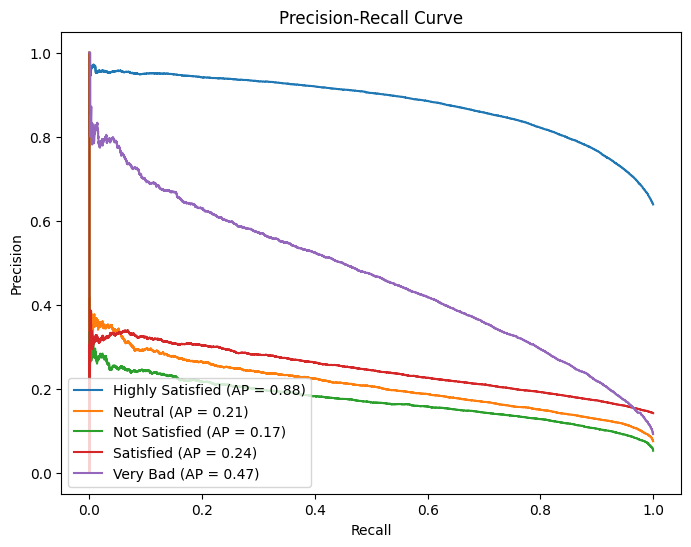

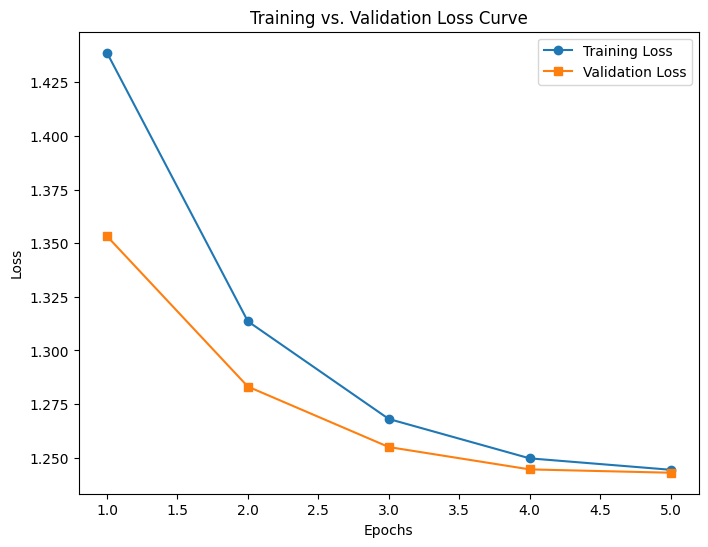

In [12]:
#Evalute Precision Redcall and Loss Curve functions
def evaluate_model_probabilities(model, test_loader):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["labels"].to(device),
            )

            outputs = model(input_ids, attention_mask=attention_mask)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)  # Convert logits to probabilities

            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    return np.array(all_labels), np.array(all_probs)

def plot_precision_recall(y_true, y_probs, class_names):
    plt.figure(figsize=(8, 6))
    
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        ap_score = average_precision_score(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'{class_name} (AP = {ap_score:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss", marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss Curve")
    plt.legend()
    plt.show()



#Evaluatiosn and Plot Curves 
y_true, y_probs = evaluate_model_probabilities(model, test_loader)
plot_precision_recall(y_true, y_probs, label_encoder.classes_)
plot_loss_curve(train_losses, val_losses)

Epoch 1: 100%|██████████| 14212/14212 [1:25:32<00:00,  2.77it/s, loss=0.537]    


Epoch 1 - Train Loss: 1.1857, Validation Loss: 0.9830


Epoch 2: 100%|██████████| 14212/14212 [3:54:31<00:00,  1.01it/s, loss=1.15]   


Epoch 2 - Train Loss: 0.8754, Validation Loss: 0.8185


Epoch 3: 100%|██████████| 14212/14212 [1:29:05<00:00,  2.66it/s, loss=0.777]    


Epoch 3 - Train Loss: 0.7840, Validation Loss: 0.7634


Epoch 4: 100%|██████████| 14212/14212 [2:01:54<00:00,  1.94it/s, loss=0.471]      


Epoch 4 - Train Loss: 0.7226, Validation Loss: 0.7331


Epoch 5: 100%|██████████| 14212/14212 [1:02:54<00:00,  3.77it/s, loss=0.586]


Epoch 5 - Train Loss: 0.6585, Validation Loss: 0.6737


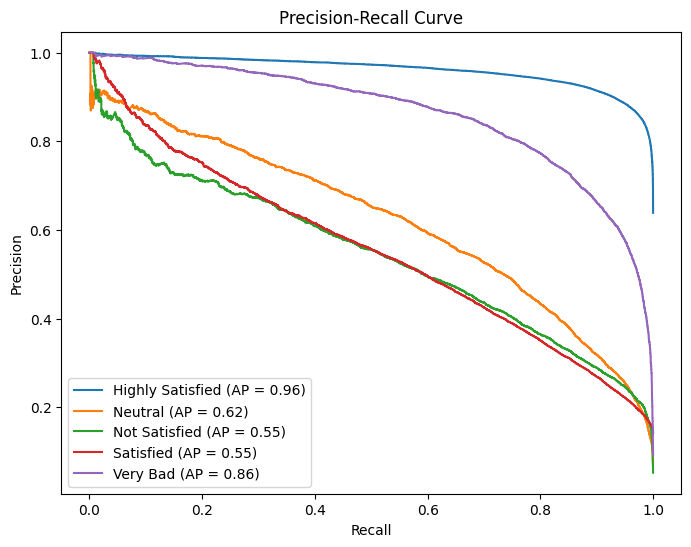

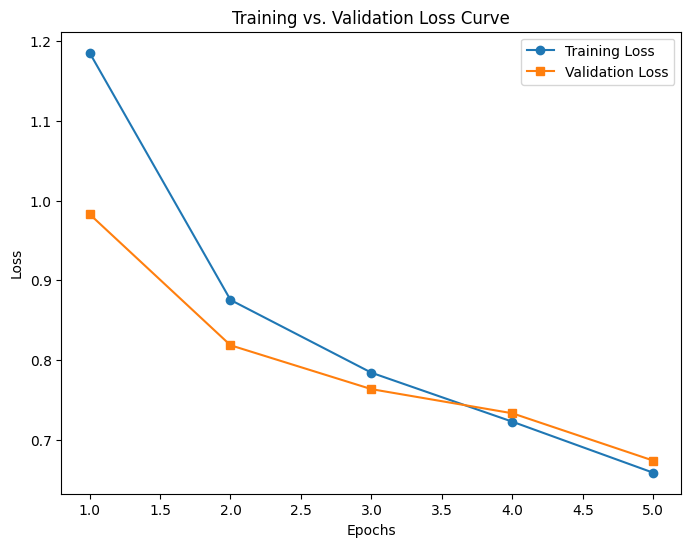

In [13]:
#Fine Tuning/Unfreeze last two layers
for param in model.bert.encoder.layer[-2:].parameters():
    param.requires_grad = True  # Unfreeze last two layers


train_losses, val_losses = train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=5, freeze=False)
y_true, y_probs = evaluate_model_probabilities(model, test_loader)
plot_precision_recall(y_true, y_probs, label_encoder.classes_)
plot_loss_curve(train_losses, val_losses)